### Tutors - expected math exam results
__Predict average math exam results for students of the tutors__  
https://www.kaggle.com/c/tutors-expected-math-exam-results


In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Paths to datasets
TRAIN_DATASET_PATH = './datasets/train.csv'
TEST_DADASET_PATH = './datasets/test.csv'

Prepared train data

In [3]:
# load train 
train_df = pd.read_csv(TRAIN_DATASET_PATH)

In [4]:
train_df.shape

(10000, 12)

In [5]:
train_df.head()

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points
0,0,40.0,0.0,1400.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,63.0
1,1,48.0,4.0,2850.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,86.0
2,2,39.0,0.0,1200.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0
3,3,46.0,5.0,1400.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,56.0
4,4,43.0,1.0,1500.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,59.0


In [6]:
train_df.tail()

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points
9995,9995,44.0,0.0,1700.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,78.0
9996,9996,51.0,0.0,1700.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,64.0
9997,9997,34.0,1.0,1250.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,58.0
9998,9998,33.0,3.0,1100.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,51.0
9999,9999,35.0,0.0,1450.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,59.0


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   10000 non-null  int64  
 1   age                  10000 non-null  float64
 2   years_of_experience  10000 non-null  float64
 3   lesson_price         10000 non-null  float64
 4   qualification        10000 non-null  float64
 5   physics              10000 non-null  float64
 6   chemistry            10000 non-null  float64
 7   biology              10000 non-null  float64
 8   english              10000 non-null  float64
 9   geography            10000 non-null  float64
 10  history              10000 non-null  float64
 11  mean_exam_points     10000 non-null  float64
dtypes: float64(11), int64(1)
memory usage: 937.6 KB


In [8]:
train_df.describe()

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4999.50000,45.878000,1.986800,1699.105000,1.719500,0.375000,0.132900,0.109600,0.053700,0.032100,0.019400,64.340800
std,2886.89568,8.043929,1.772213,524.886654,0.792264,0.484147,0.339484,0.312406,0.225436,0.176274,0.137933,13.536823
min,0.00000,23.000000,0.000000,200.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,32.000000
25%,2499.75000,40.000000,0.000000,1300.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.000000
50%,4999.50000,46.000000,2.000000,1500.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,63.000000
75%,7499.25000,51.000000,3.000000,2150.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,73.000000
max,9999.00000,68.000000,10.000000,3950.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,100.000000


<AxesSubplot:>

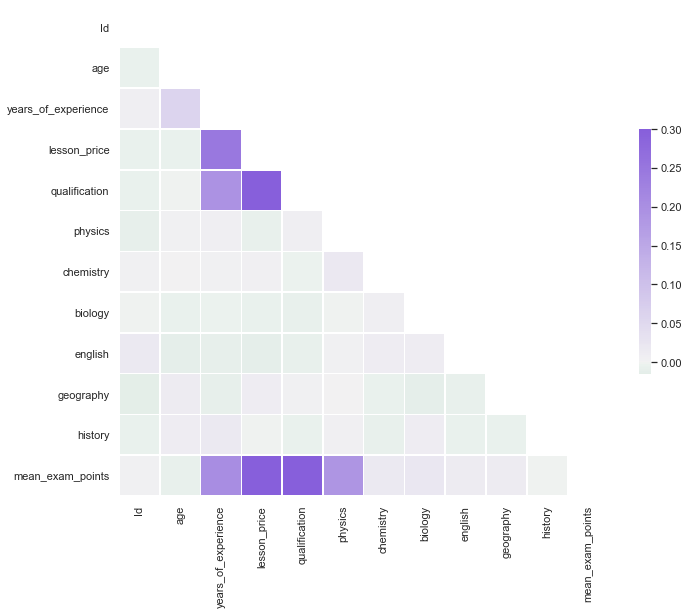

In [9]:
# Compute the correlation matrix
df_corr = train_df.corr()

sns.set_theme(style="white")

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(df_corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(150, 275, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df_corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Use PCA to create components instead years_of_experience, lesson_price & qualification

In [10]:
class PCA():
    
    def fit(self, data):
        data_ = data.astype(float)
        mean=np.apply_along_axis(np.mean, 0, data)
        std=np.apply_along_axis(np.std, 0, data)
        data_normed=(data-mean[np.newaxis, :])/std[np.newaxis, :]

        covariance_matrix = data_normed.T.dot(data_normed)
        eig_values, eig_vectors = np.linalg.eig(covariance_matrix)

        eig_pairs = [(np.abs(eig_values[i]), eig_vectors[:, i]) for i in range(len(eig_values))]
        eig_pairs.sort(key=lambda x: x[0], reverse=True)

        eig_sum = sum(eig_values)
        var_exp = [(i / eig_sum) * 100 for i in sorted(eig_values, reverse=True)]
        cum_var_exp = np.cumsum(var_exp)
        print(f'Fraction of variance described by each of the components \n{var_exp}')
        
        self.data = data_
        self.eig_pairs = eig_pairs
    
    def get_components(self, n_components):
        W = np.hstack(([self.eig_pairs[j][1].reshape(self.data.shape[1],1) for j in range(n_components)]))
        return self.data.dot(W)

In [11]:
columns_to_pca = ['years_of_experience', 'lesson_price', 'qualification']

In [12]:
pca = PCA()
pca.fit(train_df[columns_to_pca])

Fraction of variance described by each of the components 
[63.30147022934488, 29.768509596084776, 6.930020174570341]


In [13]:
train_pca = pca.get_components(2)

Add a new feature

In [14]:
mean_exam_points_by_qualification = train_df.groupby(['age', 'qualification'], as_index=False).agg({'mean_exam_points':'median'})\
                       .rename(columns={'mean_exam_points':'mean_exam_points_by_qualification'})
mean_exam_points_by_qualification.head()

,age,qualification,mean_exam_points_by_qualification
0,23.0,1.0,58.0
1,23.0,2.0,67.0
2,23.0,3.0,89.0
3,24.0,1.0,65.0
4,24.0,2.0,72.5


In [15]:
train_df = train_df.merge(mean_exam_points_by_qualification, on=['age', 'qualification'], how='left')
train_df.head()

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points,mean_exam_points_by_qualification
0,0,40.0,0.0,1400.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,63.0,58.0
1,1,48.0,4.0,2850.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,86.0,83.0
2,2,39.0,0.0,1200.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0,58.0
3,3,46.0,5.0,1400.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,56.0,58.0
4,4,43.0,1.0,1500.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,59.0,55.0


Create a Gradient Boosting class based on Decision Trees 

In [16]:
class Node:
    
    def __init__(self, index, t, true_branch, false_branch):
        self.index = index  # индекс признака, по которому ведется сравнение с порогом в этом узле
        self.t = t  # значение порога
        self.true_branch = true_branch  # поддерево, удовлетворяющее условию в узле
        self.false_branch = false_branch  # поддерево, не удовлетворяющее условию в узле
        

class Leaf:

    def __init__(self, data, target_values):
        self.data = data
        self.target_values = target_values
        self.prediction = self.predict()

    def predict(self):
        return np.mean(self.target_values)

In [17]:
class DecisionTreeRegressor:
    
    def __init__(self, max_depth):
        self.max_depth = max_depth
        self.tree = None
        
    def _H(self, target_values):
        return np.var(target_values)

    def _quality(self, left_target_values, right_target_values, current_H):
        p = float(left_target_values.shape[0]) / (left_target_values.shape[0] + right_target_values.shape[0])
        return current_H - p * self._H(left_target_values) - (1 - p) * self._H(right_target_values)

    def _split(self, data, target_values, index, t):
        left = np.where(data[:, index] <= t)
        right = np.where(data[:, index] > t)

        true_data = data[left]
        false_data = data[right]
        true_target_values = target_values[left]
        false_target_values = target_values[right]

        return true_data, false_data, true_target_values, false_target_values
    
    def _find_best_split(self, data, target_values):
        min_leaf = 5
        best_quality = 0
        best_t = None
        best_index = None

        current_H = self._H(target_values)

        n_features = data.shape[1]
        
        for index in range(n_features):
            t_values = np.unique([row[index] for row in data])

            for t in t_values:
                true_data, false_data, true_target_values, false_target_values = self._split(data, target_values, index, t)
                if len(true_data) < min_leaf or len(false_data) < min_leaf:
                    continue

                current_quality = self._quality(true_target_values, false_target_values, current_H)
                if current_quality > best_quality:
                    best_quality, best_t, best_index = current_quality, t, index

        return best_quality, best_t, best_index

    def _build_tree(self, data, target_values, current_depth):
        if current_depth > self.max_depth:
            return Leaf(data, target_values)
        
        current_depth += 1
        
        quality, t, index = self._find_best_split(data, target_values)

        #  The base case
        if quality == 0:
            return Leaf(data, target_values)

        true_data, false_data, true_target_values, false_target_values = self._split(data, target_values, index, t)

        # Use recurcion to build two trees
        true_branch = self._build_tree(true_data, true_target_values, current_depth)
        false_branch = self._build_tree(false_data, false_target_values, current_depth)
    
        return Node(index, t, true_branch, false_branch)
        
    def build(self, data, target_values, max_depth=None):
        self.tree = self._build_tree(data, target_values, 0)

    def _predict(self, obj, node):
        if isinstance(node, Leaf):
            answer = node.prediction
            return answer

        if obj[node.index] <= node.t:
            return self._predict(obj, node.true_branch)
        else:
            return self._predict(obj, node.false_branch)

    def predict(self, data):
        predicted_values = []
        for obj in data:
            prediction = self._predict(obj, self.tree)
            predicted_values.append(prediction)
        return predicted_values

In [18]:
class GradientBoosting:
    
    def __init__(self, n_trees, coef, max_depth, alpha):
        self.n_trees = n_trees
        self.coefs = [coef] * n_trees
        self.max_depth = max_depth
        self.alpha = alpha
        self.trees = []
        
    @staticmethod
    def bias(y, z):
        return 2 * (y - z)
    
    def fit(self, X, y):     
        for i in range(self.n_trees):
            tree = DecisionTreeRegressor(max_depth=self.max_depth)
            if len(self.trees) == 0:
                tree.build(X, y)
            else:
                target = self.predict(X)
                tree.build(X, self.bias(y, target))

            self.trees.append(tree)
        
    def predict(self, X):
        return np.array([sum([self.alpha * coef * model.predict([x])[0] for model, coef in 
                              zip(self.trees, self.coefs)]) for x in X])

In [19]:
# The evaluation metric
def r_square(y, y_real):
    ss_total=np.sum((y_real-np.mean(y_real))**2)
    ss_res=np.sum((y_real-y)**2)
    return 1-ss_res/ss_total

Split train data to X & y as numpy arrays

In [20]:
X = train_df.drop(['Id', 'mean_exam_points', 'years_of_experience', 'lesson_price', 'qualification'], axis=1).values
y = train_df['mean_exam_points'].values

In [21]:
# Add two principal components
X = np.hstack((X, train_pca.values))

Standardize features

In [22]:
def standardize(data, col_ids=None):
    means = np.mean(data, axis=0)
    stds = np.std(data, axis=0)
    if col_ids is None:
        col_ids = range(data.shape[1])
    
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            if j in col_ids:
                data[i][j] = (data[i][j] - means[j])/stds[j]
            else:
                data[i][j] = data[i][j]
    return data

In [23]:
columns_ids_to_standardize = [0, 7, 8, 9]

In [24]:
X = standardize(X, columns_ids_to_standardize)

Split X & y on train and valid datasets

In [25]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3)

In [26]:
# Parameters for fitting a model
n_trees = 250
max_depth = 3
alpha = 0.1
coef = 1

In [28]:
gb_model = GradientBoosting(n_trees=n_trees, coef=coef, max_depth=max_depth, alpha=alpha)

In [29]:
gb_model.fit(X_train, y_train)

In [30]:
y_train_preds = gb_model.predict(X_train)
print(f'Train r2-score: {r_square(y_train_preds, y_train)}')

Train r2-score: 0.8410413950800788


In [31]:
y_valid_preds = gb_model.predict(X_valid)
print(f'Valid r2-score: {r_square(y_valid_preds, y_valid)}')

Valid r2-score: 0.7682851362992125


Fit a model on a hole dataset and cross-validate a result

In [88]:
def cross_val(X, y, model):
    indexes = np.arange(len(y))%5
    score_list = []
    skl_list =[]

    for i in range(5):
        y_actual = np.array(y[indexes == i])
        model.fit(X[indexes != i], y[indexes != i])
        y_predicted = np.array(model.predict(X[indexes == i]))
        score_list.append(r_square(y_predicted, y_actual))
        skl_list.append(r2_score(y_actual, y_predicted))
    return score_list, skl_list

In [27]:
final_model = GradientBoosting(n_trees=n_trees, coef=coef, max_depth=max_depth, alpha=alpha)

In [ ]:
cross_val_scores, skl_scores = cross_val(X, y, final_model)
cross_val_scores

In [ ]:
print(f'Mean cross-val score: {np.mean(cross_val_scores)}')

In [28]:
final_model.fit(X, y)

__Prepare test dataset__

In [29]:
test_df = pd.read_csv(TEST_DADASET_PATH)

In [30]:
test_df.shape

(10000, 11)

In [31]:
test_df.head()

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history
0,10000,46.0,3.0,1050.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,10001,43.0,3.0,1850.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
2,10002,52.0,1.0,1550.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,10003,57.0,6.0,2900.0,3.0,1.0,0.0,1.0,0.0,0.0,0.0
4,10004,44.0,4.0,3150.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0


In [32]:
test_df.tail()

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history
9995,19995,42.0,0.0,1500.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9996,19996,51.0,2.0,2200.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0
9997,19997,33.0,5.0,1100.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9998,19998,48.0,0.0,1750.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
9999,19999,49.0,5.0,2000.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0


In [33]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   10000 non-null  int64  
 1   age                  10000 non-null  float64
 2   years_of_experience  10000 non-null  float64
 3   lesson_price         10000 non-null  float64
 4   qualification        10000 non-null  float64
 5   physics              10000 non-null  float64
 6   chemistry            10000 non-null  float64
 7   biology              10000 non-null  float64
 8   english              10000 non-null  float64
 9   geography            10000 non-null  float64
 10  history              10000 non-null  float64
dtypes: float64(10), int64(1)
memory usage: 859.5 KB


In [34]:
test_df.describe()

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history
count,10000.00000,10000.00000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000
mean,14999.50000,45.97280,1.980000,1697.095000,1.709400,0.38130,0.123500,0.120100,0.056000,0.031400,0.0184
std,2886.89568,7.95628,1.783289,524.262621,0.793483,0.48573,0.329027,0.325095,0.229933,0.174405,0.1344
min,10000.00000,23.00000,0.000000,200.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0000
25%,12499.75000,41.00000,0.000000,1300.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0000
50%,14999.50000,46.00000,2.000000,1500.000000,2.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0000
75%,17499.25000,51.00000,3.000000,2150.000000,2.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.0000
max,19999.00000,68.00000,10.000000,4050.000000,4.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.0000


Create two principal components

In [35]:
pca_test = PCA()
pca_test.fit(test_df[columns_to_pca])

Fraction of variance described by each of the components 
[63.48365322868179, 29.930136223172187, 6.586210548146024]


In [36]:
test_pca = pca_test.get_components(2)

Add mean_exam_points_by_qualification feature

In [37]:
test_df = test_df.merge(mean_exam_points_by_qualification, on=['age', 'qualification'], how='left')
test_df.head()

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points_by_qualification
0,10000,46.0,3.0,1050.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,58.0
1,10001,43.0,3.0,1850.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,66.0
2,10002,52.0,1.0,1550.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,56.0
3,10003,57.0,6.0,2900.0,3.0,1.0,0.0,1.0,0.0,0.0,0.0,84.0
4,10004,44.0,4.0,3150.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,83.0


In [38]:
test_df.loc[test_df.mean_exam_points_by_qualification.isna(), 'mean_exam_points_by_qualification'] = round(
    mean_exam_points_by_qualification.loc[mean_exam_points_by_qualification.qualification == 4, 'mean_exam_points_by_qualification'].mean(), 0)

Transform a dataframe to an array

In [39]:
test_ids = test_df['Id'].values

In [40]:
test_df = test_df.drop(['Id', 'years_of_experience', 'lesson_price', 'qualification'], axis=1)
test_df.head()

,age,physics,chemistry,biology,english,geography,history,mean_exam_points_by_qualification
0,46.0,0.0,1.0,0.0,0.0,0.0,0.0,58.0
1,43.0,0.0,0.0,0.0,0.0,0.0,0.0,66.0
2,52.0,1.0,0.0,0.0,0.0,0.0,0.0,56.0
3,57.0,1.0,0.0,1.0,0.0,0.0,0.0,84.0
4,44.0,1.0,0.0,0.0,0.0,0.0,0.0,83.0


In [41]:
test = test_df.values

In [43]:
# Add two principal components
test = np.hstack((test, test_pca.values))

In [44]:
# Standartize values
test_std = standardize(test, columns_ids_to_standardize)

Predict values on a test dataset

In [45]:
test_preds = final_model.predict(test)

In [46]:
submission = pd.DataFrame({'Id': test_ids, 'mean_exam_points': test_preds})
submission

,Id,mean_exam_points
0,10000,54.233463
1,10001,64.903033
2,10002,53.717724
3,10003,91.696079
4,10004,89.550768
...,...,...
9995,19995,43.368694
9996,19996,83.334428
9997,19997,55.394567
9998,19998,61.904897


In [47]:
submission.to_csv('./AVasilev_prediction.csv', index=None)